___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test split*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


## Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company (https://www.autoscout24.com) in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, and Elastic-Net algorithms respectively*** (after completion of Supervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally, you can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






## Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
df = pd.read_csv("scoutcar_notdummy.csv")
df.head()

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Paint_Type,Nr.OfDoors,Nr.OfSeats,Upholstery_Type,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security
0,Audi A1,Sedans,15770,VAT deductible,3.000,Used,56013.000,2.000,1,Metallic,5.000,5.000,Cloth,Diesel,front,Automatic,7.000,66.000,1422.000,1220.000,3.800,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,Audi A1,Sedans,14500,Price negotiable,2.000,Used,80000.000,1.000,0,Metallic,3.000,4.000,Cloth,Benzine,front,Automatic,7.000,141.000,1798.000,1255.000,5.600,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,Audi A1,Sedans,14640,VAT deductible,3.000,Used,83450.000,1.000,0,Metallic,4.000,4.000,Cloth,Diesel,front,Automatic,7.000,85.000,1598.000,1250.000,3.800,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,Audi A1,Sedans,14500,VAT deductible,3.000,Used,73000.000,1.000,0,Metallic,3.000,4.000,Cloth,Diesel,front,Automatic,6.000,66.000,1422.000,1195.000,3.800,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,Audi A1,Sedans,16790,VAT deductible,3.000,Used,16200.000,1.000,1,Metallic,5.000,5.000,Cloth,Diesel,front,Automatic,7.000,66.000,1422.000,1250.000,4.100,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."


***general review***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15913 entries, 0 to 15912
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make_Model               15913 non-null  object 
 1   Body_Type                15913 non-null  object 
 2   Price                    15913 non-null  int64  
 3   Vat                      15913 non-null  object 
 4   Age                      15913 non-null  float64
 5   Type                     15913 non-null  object 
 6   Km                       15913 non-null  float64
 7   Previous_Owners          15913 non-null  float64
 8   Inspection_New           15913 non-null  int64  
 9   Paint_Type               15913 non-null  object 
 10  Nr.OfDoors               15913 non-null  float64
 11  Nr.OfSeats               15913 non-null  float64
 12  Upholstery_Type          15913 non-null  object 
 13  Fuel                     15913 non-null  object 
 14  Drive_Chain           

In [4]:
df.shape, df.size

((15913, 26), 413738)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,Price,Age,Km,Previous_Owners,Inspection_New,Nr.OfDoors,Nr.OfSeats,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2)
count,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000,15913.000
mean,18024.340,1.391,31975.616,0.979,0.247,4.661,4.952,5.937,88.494,1427.809,1342.698,4.817,117.778
std,7381.315,1.120,37075.328,0.424,0.431,0.641,0.478,0.705,26.667,277.497,207.193,0.892,18.043
min,4950.000,0.000,0.000,0.000,0.000,2.000,2.000,5.000,40.000,890.000,840.000,1.600,36.000
25%,12850.000,0.000,2000.000,1.000,0.000,4.000,5.000,5.000,66.000,1229.000,1165.000,4.000,104.000
50%,16900.000,1.000,20413.000,1.000,0.000,5.000,5.000,6.000,85.000,1461.000,1279.000,4.800,117.000
75%,21900.000,2.000,46928.000,1.000,0.000,5.000,5.000,6.000,103.000,1598.000,1441.000,5.400,129.000
max,74600.000,3.000,317000.000,4.000,1.000,5.000,7.000,8.000,294.000,2967.000,2471.000,9.100,253.000


***object type columns***

In [7]:
df.select_dtypes('object').nunique()

Make_Model                  8
Body_Type                   8
Vat                         2
Type                        5
Paint_Type                  3
Upholstery_Type             5
Fuel                        4
Drive_Chain                 3
Gearing_Type                3
Comfort & Convenience    6196
Entertainment & Media     346
Extras                    659
Safety & Security        4442
dtype: int64

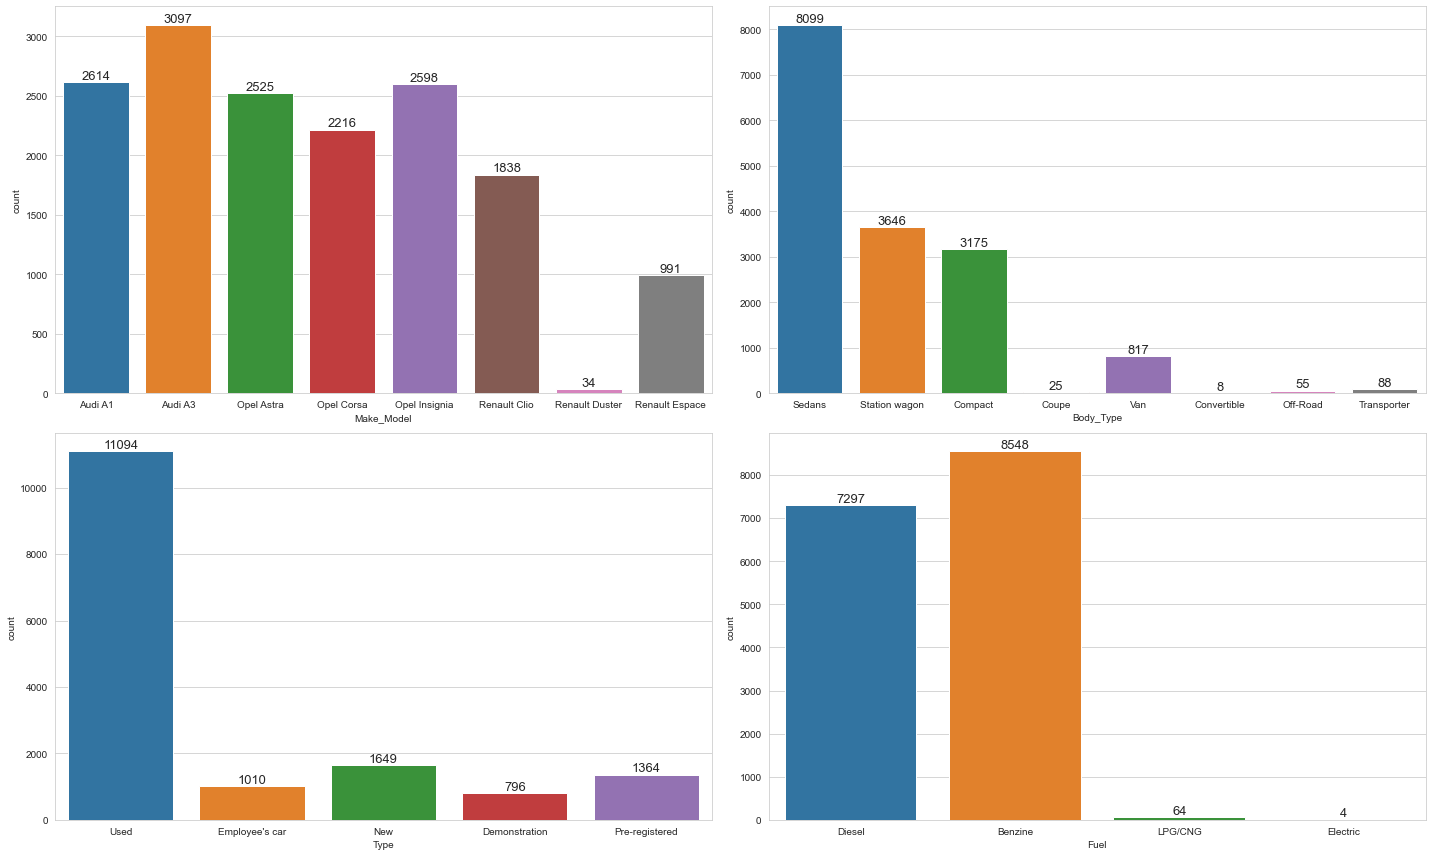

In [8]:
columns = ['Make_Model', 'Body_Type', 'Type', 'Fuel']
index = 0
plt.figure(figsize=(20,12))
for col in columns:    
    index += 1
    plt.subplot(2,2,index)
    a = sns.countplot(data=df, x=col)
    a.bar_label(a.containers[0], fontsize=13)
plt.tight_layout()

***target column***

<AxesSubplot:xlabel='Price', ylabel='Count'>

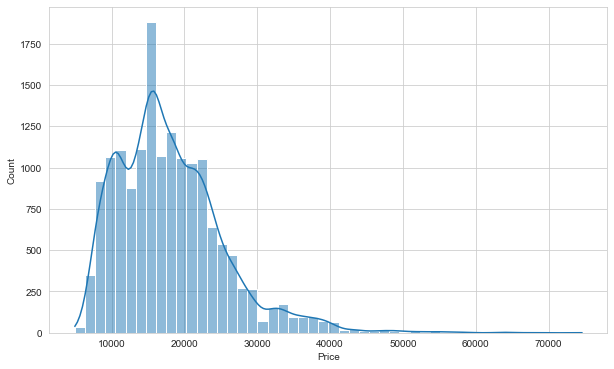

In [9]:
sns.histplot(df.Price, bins=50, kde=True)

In [10]:
skew(df.Price)

1.2363782515627046

<AxesSubplot:xlabel='Price'>

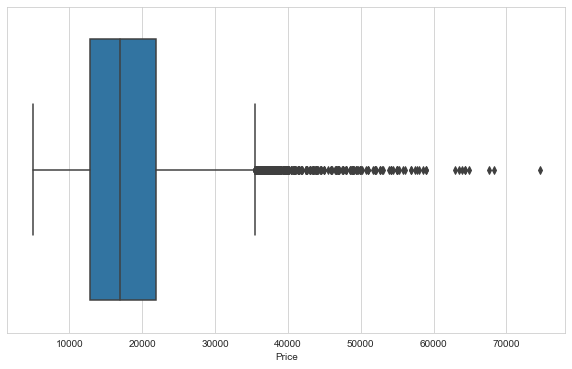

In [11]:
sns.boxplot(data=df, x='Price')

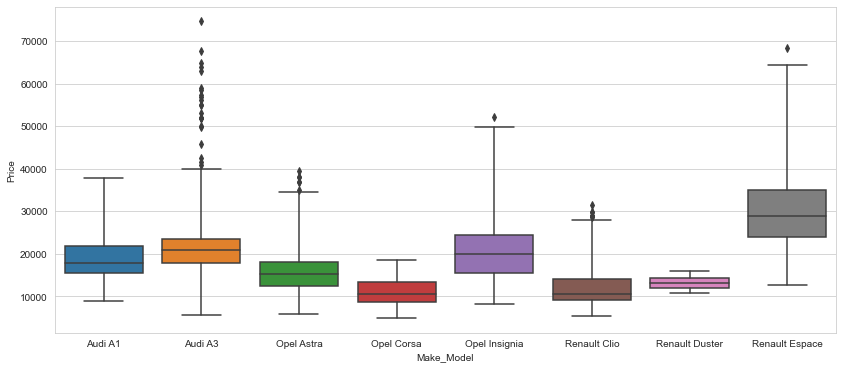

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Make_Model', y='Price', data=df, whis=3)
plt.show()

***correlations***

<AxesSubplot:>

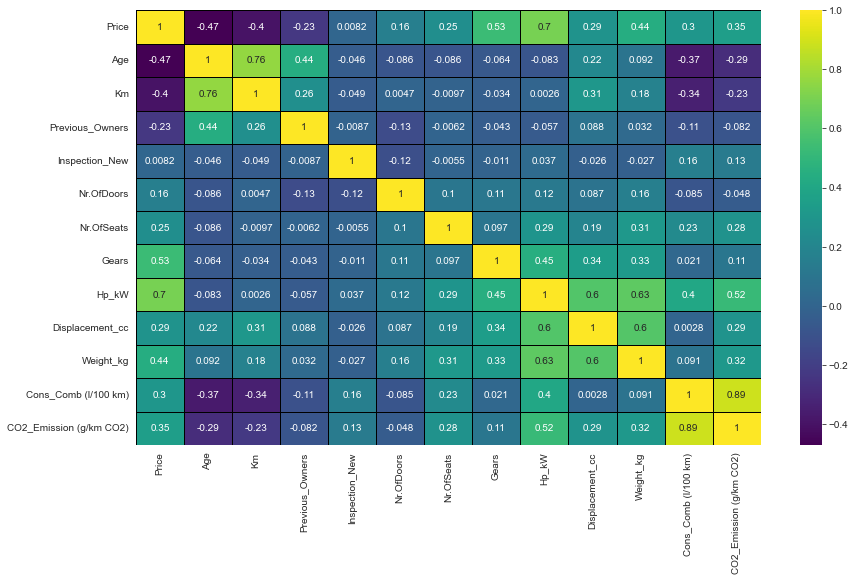

In [13]:
plt.figure(figsize=(14,8))
df_numeric = df.select_dtypes(include ="number")
sns.heatmap(df_numeric.corr(), annot =True, cmap='viridis', linewidth=1, linecolor='black')

<AxesSubplot:>

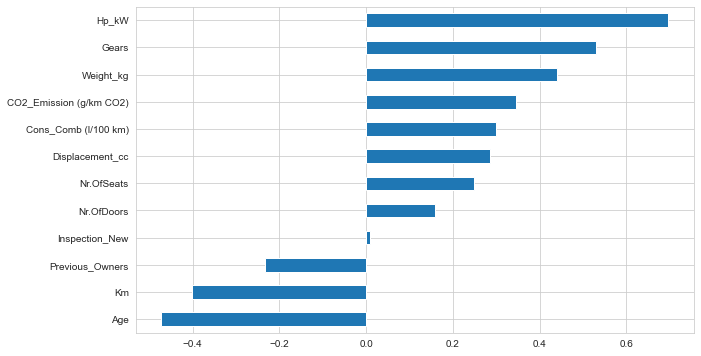

In [14]:
df.corr()['Price'].drop('Price').sort_values().plot.barh()

***multicollinearity control***

In [15]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [16]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

***get dummies***

In [17]:
df2 = df.copy()

In [18]:
df = df.join(df["Comfort & Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment & Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety & Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [19]:
df.drop(["Comfort & Convenience","Entertainment & Media","Extras","Safety & Security"], axis=1, inplace=True)

In [20]:
df = pd.get_dummies(df, drop_first =True)
df.head()

,Price,Age,Km,Previous_Owners,Inspection_New,Nr.OfDoors,Nr.OfSeats,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,...,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,Make_Model_Audi A3,Make_Model_Opel Astra,Make_Model_Opel Corsa,Make_Model_Opel Insignia,Make_Model_Renault Clio,Make_Model_Renault Duster,Make_Model_Renault Espace,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Full leather,Upholstery_Type_Part leather,Upholstery_Type_Velour,Upholstery_Type_alcantara,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Drive_Chain_front,Drive_Chain_rear,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,15770,3.000,56013.000,2.000,1,5.000,5.000,7.000,66.000,1422.000,1220.000,3.800,99.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,14500,2.000,80000.000,1.000,0,3.000,4.000,7.000,141.000,1798.000,1255.000,5.600,129.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,14640,3.000,83450.000,1.000,0,4.000,4.000,7.000,85.000,1598.000,1250.000,3.800,99.000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,14500,3.000,73000.000,1.000,0,3.000,4.000,6.000,66.000,1422.000,1195.000,3.800,99.000,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,16790,3.000,16200.000,1.000,1,5.000,5.000,7.000,66.000,1422.000,1250.000,4.100,109.000,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [21]:
df.shape, df.size

((15913, 139), 2211907)

In [22]:
df.isnull().any().any()

False

In [23]:
corr_by_price = df.corr()['Price'].sort_values()[:-1]
corr_by_price

Age                                        -0.472
Gearing_Type_Manual                        -0.432
Km                                         -0.401
Make_Model_Opel Corsa                      -0.379
Type_Used                                  -0.366
Make_Model_Renault Clio                    -0.298
Previous_Owners                            -0.232
Drive_Chain_front                          -0.156
Make_Model_Opel Astra                      -0.128
em_CD player                               -0.103
em_On-board computer                       -0.077
ss_Central door lock with remote control   -0.070
Body_Type_Sedans                           -0.056
Paint_Type_Perl effect                     -0.050
ss_Isofix                                  -0.046
ss_Central door lock                       -0.044
ss_Fog lights                              -0.043
ss_Power steering                          -0.041
Paint_Type_Uni/basic                       -0.035
ss_Head airbag                             -0.034


***

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to split the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12730, 138)
Train target shape   :  (12730,)
Test features shape  :  (3183, 138)
Test target shape    :  (3183,)


In [28]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    #pd.options.display.float_format = '{:.3f}'.format
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

***

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficient
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
train_val(lr_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.894,0.884
mae,1665.033,1720.981
mse,5727441.359,6483516.537
rmse,2393.207,2546.275


***adjusted R2 score***

In [32]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   
    p = df.shape[1]-1 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [33]:
y_pred = lr_model.predict(X_test)
adj_r2(y_test, y_pred, df)

0.883245100728272

***cross validation***

In [34]:
# CROSS VALIDATION

model = LinearRegression() # LinearRegression(normalize=True) ===> for minmax scaling

scores = cross_validate(model, X_train, y_train, scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                   0.890
test_neg_mean_absolute_error          -1689.235
test_neg_mean_squared_error        -5927331.606
test_neg_root_mean_squared_error      -2431.307
dtype: float64

In [35]:
# WRONG PREDICTION RATE

-scores.iloc[:, 2:].mean()[3] / df.Price.mean()

0.13489020623636327

***prediction error and residuals***

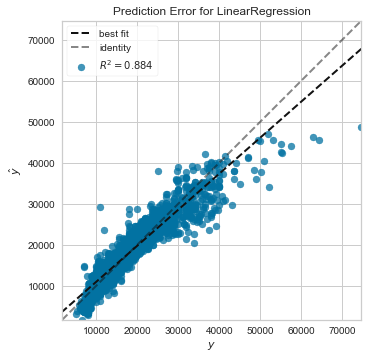

In [36]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)

visualizer.show(); 

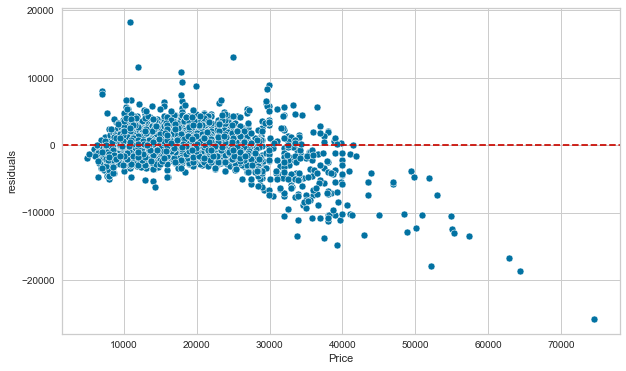

In [37]:
# Residuals Plot (seaborn)
plt.figure(figsize = (10,6))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

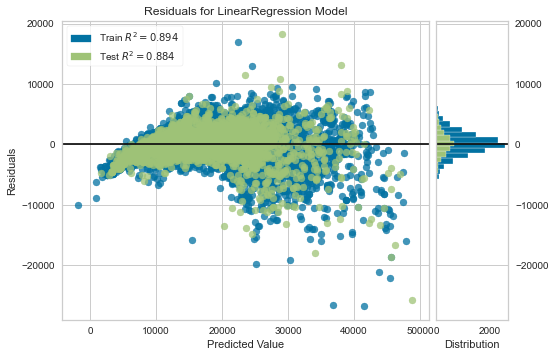

In [38]:
# Residuals Plot (yellowbrick)
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show(); 

<IPython.core.display.Javascript object>

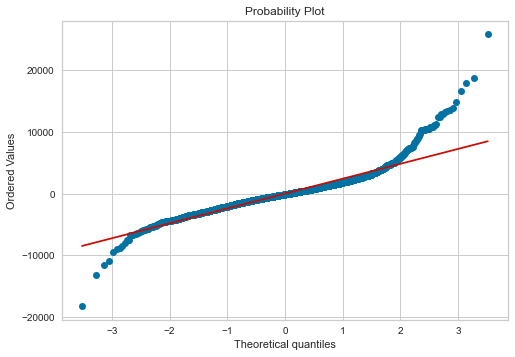

In [39]:
stats.probplot(residuals, dist ="norm", plot=plt);

<div class="alert alert-block alert-danger">
    
<b>dropping observations from the dataset that worsen my predictions</b>
    
</div>

In [40]:
len(df[df.Price>35000])

495

In [41]:
df2[df2.Price>35000].groupby('Make_Model').size()

Make_Model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
dtype: int64

In [42]:
df2.Make_Model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: Make_Model, dtype: int64

In [43]:
df3 = df[~(df.Price>35000)]
df3

,Price,Age,Km,Previous_Owners,Inspection_New,Nr.OfDoors,Nr.OfSeats,Gears,Hp_kW,Displacement_cc,Weight_kg,Cons_Comb (l/100 km),CO2_Emission (g/km CO2),cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,...,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,Make_Model_Audi A3,Make_Model_Opel Astra,Make_Model_Opel Corsa,Make_Model_Opel Insignia,Make_Model_Renault Clio,Make_Model_Renault Duster,Make_Model_Renault Espace,Body_Type_Convertible,Body_Type_Coupe,Body_Type_Off-Road,Body_Type_Sedans,Body_Type_Station wagon,Body_Type_Transporter,Body_Type_Van,Vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_Type_Full leather,Upholstery_Type_Part leather,Upholstery_Type_Velour,Upholstery_Type_alcantara,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Drive_Chain_front,Drive_Chain_rear,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,15770,3.000,56013.000,2.000,1,5.000,5.000,7.000,66.000,1422.000,1220.000,3.800,99.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,14500,2.000,80000.000,1.000,0,3.000,4.000,7.000,141.000,1798.000,1255.000,5.600,129.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,14640,3.000,83450.000,1.000,0,4.000,4.000,7.000,85.000,1598.000,1250.000,3.800,99.000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,14500,3.000,73000.000,1.000,0,3.000,4.000,6.000,66.000,1422.000,1195.000,3.800,99.000,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,16790,3.000,16200.000,1.000,1,5.000,5.000,7.000,66.000,1422.000,1250.000,4.100,109.000,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,33990,1.000,10803.000,1.000,0,5.000,5.000,6.000,118.000,1598.000,1734.000,4.600,120.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,...,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,

***

***data pre-processing and modelling with new dataset***

In [44]:
X = df3.drop("Price", axis=1)
y = df3["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12334, 138)
Train target shape   :  (12334,)
Test features shape  :  (3084, 138)
Test target shape    :  (3084,)


***

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [47]:
train_val(lr_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.902,0.902
mae,1400.487,1391.868
mse,3702271.884,3635390.249
rmse,1924.129,1906.670


***cross validation***

In [48]:
# CROSS VALIDATION

model = LinearRegression() # LinearRegression(normalize=True) ===> for minmax scaling

scores = cross_validate(model, X_train, y_train, scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                   0.899
test_neg_mean_absolute_error          -1420.967
test_neg_mean_squared_error        -3825843.758
test_neg_root_mean_squared_error      -1955.012
dtype: float64

In [49]:
# AVERAGE WRONG PREDICTION RATE

-scores.iloc[:, 2:].mean()[3] / df3.Price.mean()

0.11307974291844002

In [50]:
# scores
y_pred = lr_model.predict(X_test)

lr_model_R2 = r2_score(y_test, y_pred)
lr_model_mae = mean_absolute_error(y_test, y_pred)
lr_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_model_cvscore = -(scores.iloc[:, 2:].mean()[3])

***prediction error and residuals***

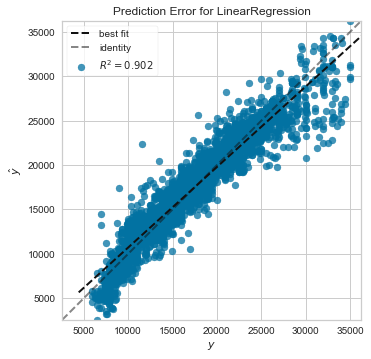

In [51]:
# yellowbrick

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)

visualizer.show(); 

<IPython.core.display.Javascript object>

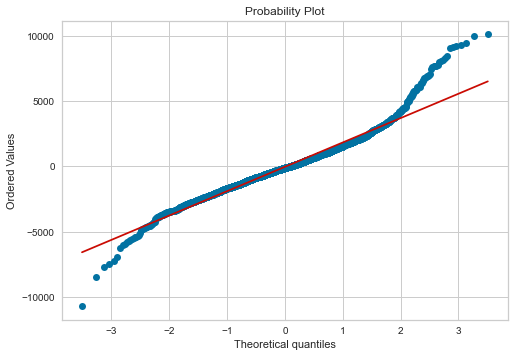

In [52]:
residuals = y_test-y_pred
stats.probplot(residuals, dist ="norm", plot=plt);

In [53]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': -(y_test-y_pred) }
compare = pd.DataFrame(my_dict)
comp_sample = compare.sample(15)
comp_sample

,Actual,Pred,Residual
8140,18990,18603.024,-386.976
1616,22400,20829.526,-1570.474
10225,10970,11590.122,620.122
10133,14899,17165.854,2266.854
15204,19999,23888.055,3889.055
13961,9000,8168.186,-831.814
299,14250,16529.188,2279.188
12099,21540,22091.786,551.786
2591,21980,20216.912,-1763.088
13501,8480,8212.797,-267.203


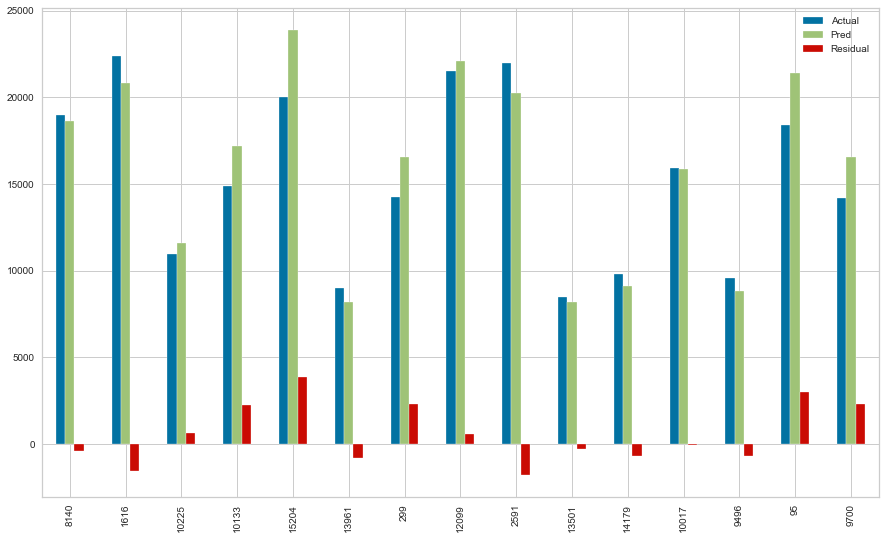

In [54]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

***coefficients of determination (feature importance)***

In [55]:
pd.DataFrame(lr_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
Make_Model_Renault Duster,-8470.615
Make_Model_Renault Clio,-5659.368
Make_Model_Opel Corsa,-5182.552
Make_Model_Opel Astra,-3547.877
Type_Employee's car,-2053.344
Drive_Chain_rear,-1986.768
Type_Used,-1975.892
Gearing_Type_Manual,-1563.645
Drive_Chain_front,-1476.369
Age,-1452.684


***

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

***scaling***

In [56]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
np.around(X_train_scaled[:10, :4], decimals=4)  # first column is the 'age' column

array([[0.3333, 0.0525, 0.25  , 1.    ],
       [0.6667, 0.3312, 0.25  , 1.    ],
       [0.3333, 0.0792, 0.25  , 1.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.6667, 0.0849, 0.5   , 0.    ],
       [0.6667, 0.1388, 0.25  , 0.    ],
       [1.    , 0.2008, 0.25  , 0.    ],
       [1.    , 0.1584, 0.5   , 0.    ],
       [0.6667, 0.183 , 0.25  , 0.    ]])

***modelling***

In [58]:
from sklearn.linear_model import Ridge, RidgeCV

In [59]:
ridge_model = Ridge(random_state=101)
ridge_model.fit(X_train_scaled,y_train)

Ridge(random_state=101)

In [60]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.902,0.902
mae,1400.433,1391.371
mse,3703952.618,3637199.495
rmse,1924.566,1907.144


***grid search (finding best alpha for Ridge)***

In [61]:
alpha_space = np.linspace(0.01, 50, 100)
alpha_space

array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.09909091e+00, 9.60404040e+00,
       1.01089899e+01, 1.06139394e+01, 1.11188889e+01, 1.16238384e+01,
       1.21287879e+01, 1.26337374e+01, 1.31386869e+01, 1.36436364e+01,
       1.41485859e+01, 1.46535354e+01, 1.51584848e+01, 1.56634343e+01,
       1.61683838e+01, 1.66733333e+01, 1.71782828e+01, 1.76832323e+01,
       1.81881818e+01, 1.86931313e+01, 1.91980808e+01, 1.97030303e+01,
       2.02079798e+01, 2.07129293e+01, 2.12178788e+01, 2.17228283e+01,
       2.22277778e+01, 2.27327273e+01, 2.32376768e+01, 2.37426263e+01,
       2.42475758e+01, 2.47525253e+01, 2.52574747e+01, 2.57624242e+01,
       2.62673737e+01, 2.67723232e+01, 2.72772727e+01, 2.77822222e+01,
      

In [62]:
# RIDGE GRID SEARCH

model = Ridge(random_state=101)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                    cv=10, verbose=1, n_jobs = -1).fit(X_train_scaled, y_train)

print('\n', ridge_grid_model.best_params_)
print('\n', ridge_grid_model.best_estimator_)
print('\n', ridge_grid_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits

 {'alpha': 1.0198989898989899}

 Ridge(alpha=1.0198989898989899, random_state=101)

 -1954.6448754392882


In [63]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106,0.006,0.003,0.004,0.010,{'alpha': 0.01},-1930.365,-1921.800,-2113.814,-1938.463,-1970.536,-1910.671,-1925.499,-1956.295,-2000.607,-1881.961,-1955.001,61.398,4
1,0.110,0.007,0.003,0.004,0.515,{'alpha': 0.5149494949494949},-1931.240,-1920.992,-2112.849,-1937.979,-1968.574,-1912.613,-1926.073,-1955.222,-1999.851,-1881.230,-1954.662,60.990,2
2,0.110,0.012,0.003,0.004,1.020,{'alpha': 1.0198989898989899},-1932.201,-1920.484,-2112.195,-1937.726,-1967.169,-1914.628,-1926.788,-1954.726,-1999.526,-1881.006,-1954.645,60.622,1
3,0.114,0.013,0.002,0.004,1.525,{'alpha': 1.5248484848484847},-1933.244,-1920.213,-2111.794,-1937.665,-1966.180,-1916.690,-1927.611,-1954.533,-1999.513,-1881.154,-1954.860,60.288,3
4,0.125,0.022,0.002,0.002,2.030,{'alpha': 2.0297979797979795},-1934.359,-1920.139,-2111.600,-1937.767,-1965.510,-1918.782,-1928.523,-1954.558,-1999.736,-1881.583,-1955.256,59.980,5
5,0.130,0.019,0.002,0.001,2.535,{'alpha': 2.5347474747474745},-1935.538,-1920.231,-2111.577,-1938.008,-1965.093,-1920.890,-1929.508,-1954.757,-2000.139,-1882.228,-1955.797,59.695,6
6,0.113,0.012,0.001,0.003,3.040,{'alpha': 3.039696969696969},-1936.771,-1920.463,-2111.696,-1938.369,-1964.879,-1923.007,-1930.552,-1955.100,-2000.683,-1883.040,-1956.456,59.429,7
7,0.107,0.004,0.002,0.003,3.545,{'alpha': 3.544646464646464},-1938.050,-1920.814,-2111.935,-1938.834,-1964.830,-1925.125,-1931.645,-1955.564,-2001.339,-1883.985,-1957.212,59.180,8
8,0.121,0.018,0.002,0.002,4.050,{'alpha': 4.049595959595959},-1939.368,-1921.264,-2112.274,-1939.388,-1964.918,-1927.238,-1932.779,-1956.131,-2002.085,-1885.036,-1958.048,58.944,9
9,0.127,0.028,0.003,0.002,4.555,{'alpha': 4.554545454545454},-1940.719,-1921.799,-2112.699,-1940.020,-1965.119,-1929.342,-1933.947,-1956.786,-2002.904,-1886.172,-1958.951,58.722,10


In [64]:
ridge_grid_model.best_index_

2

In [65]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.902,0.902
mae,1400.436,1391.366
mse,3704012.666,3637265.843
rmse,1924.581,1907.162


In [66]:
# AVERAGE WRONG PREDICTION RATE

-ridge_grid_model.best_score_ / df3.Price.mean()

0.11305849280022486

In [67]:
# scores
y_pred = ridge_grid_model.predict(X_test_scaled)

ridge_grid_model_R2 = r2_score(y_test, y_pred)
ridge_grid_model_mae = mean_absolute_error(y_test, y_pred)
ridge_grid_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_grid_model_cvscore = -(ridge_grid_model.best_score_)

***prediction error and residuals***

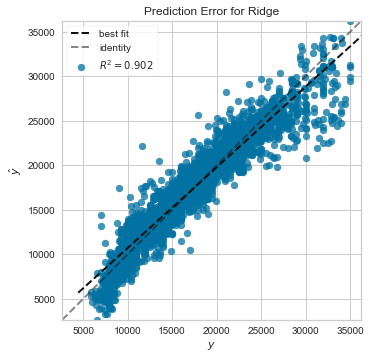

In [68]:
# yellowbrick

model = Ridge(alpha=1.0198989898989899, random_state=101)
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)

visualizer.show(); 

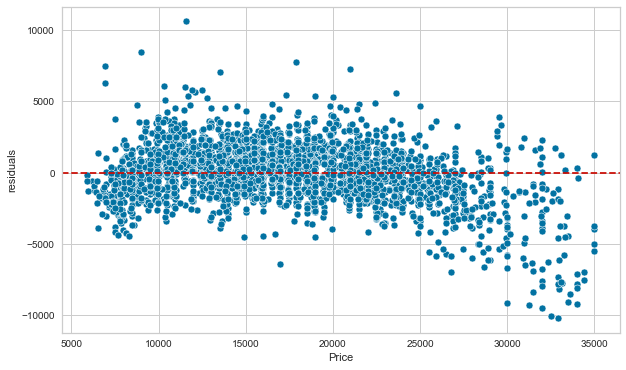

In [69]:
# Residuals Plot (seaborn)
plt.figure(figsize = (10,6))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

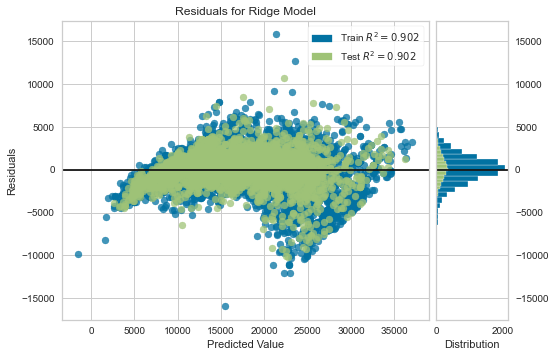

In [70]:
# Residuals Plot (yellowbrick)
model = Ridge(alpha=1.0198989898989899, random_state=101)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test)  
visualizer.show(); 

<IPython.core.display.Javascript object>

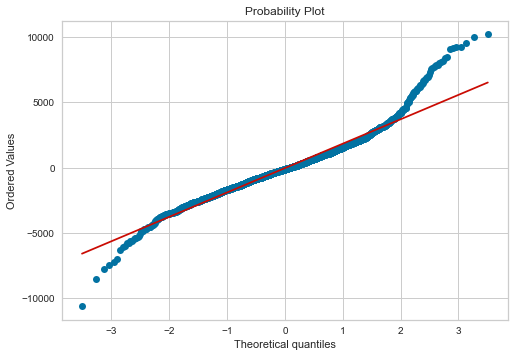

In [71]:
stats.probplot(residuals, dist ="norm", plot=plt);

In [72]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': -(y_test-y_pred) }
compare = pd.DataFrame(my_dict)
comp_sample = compare.sample(15)
comp_sample

,Actual,Pred,Residual
10392,11250,11682.266,432.266
3108,15025,14757.516,-267.484
12886,26379,23662.307,-2716.693
749,22500,24035.514,1535.514
11063,12450,14464.612,2014.612
293,15090,16786.772,1696.772
2878,16490,17918.861,1428.861
8807,13750,13620.554,-129.446
3357,23900,26584.895,2684.895
2344,18680,21078.823,2398.823


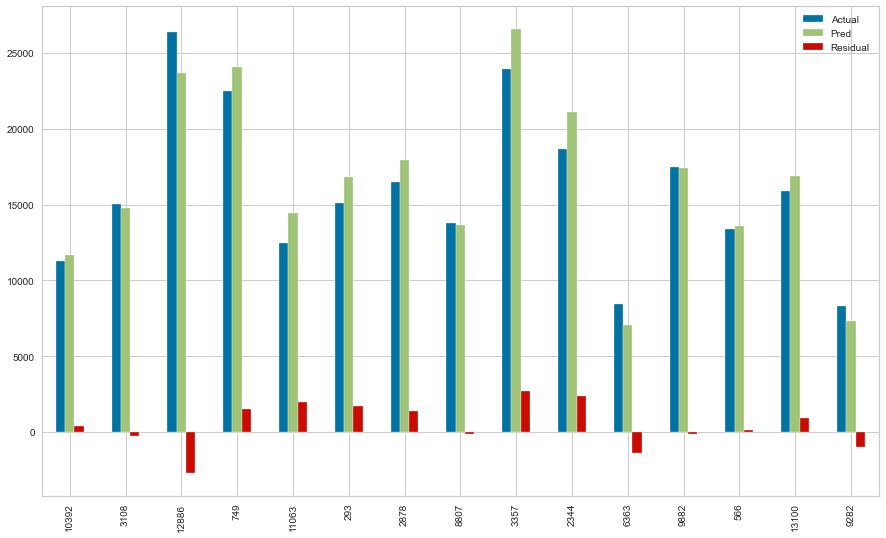

In [73]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

***coefficients of determination (feature importance)***

In [74]:
ridge_model=Ridge(alpha=1.0198989898989899, random_state=101).fit(X_train_scaled, y_train)
pd.DataFrame(ridge_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
Km,-10893.750
Make_Model_Renault Duster,-7642.578
Make_Model_Renault Clio,-5633.148
Make_Model_Opel Corsa,-5224.864
Age,-4398.523
Make_Model_Opel Astra,-3507.667
CO2_Emission (g/km CO2),-2657.441
Weight_kg,-2606.483
Displacement_cc,-2552.554
Type_Employee's car,-2037.142


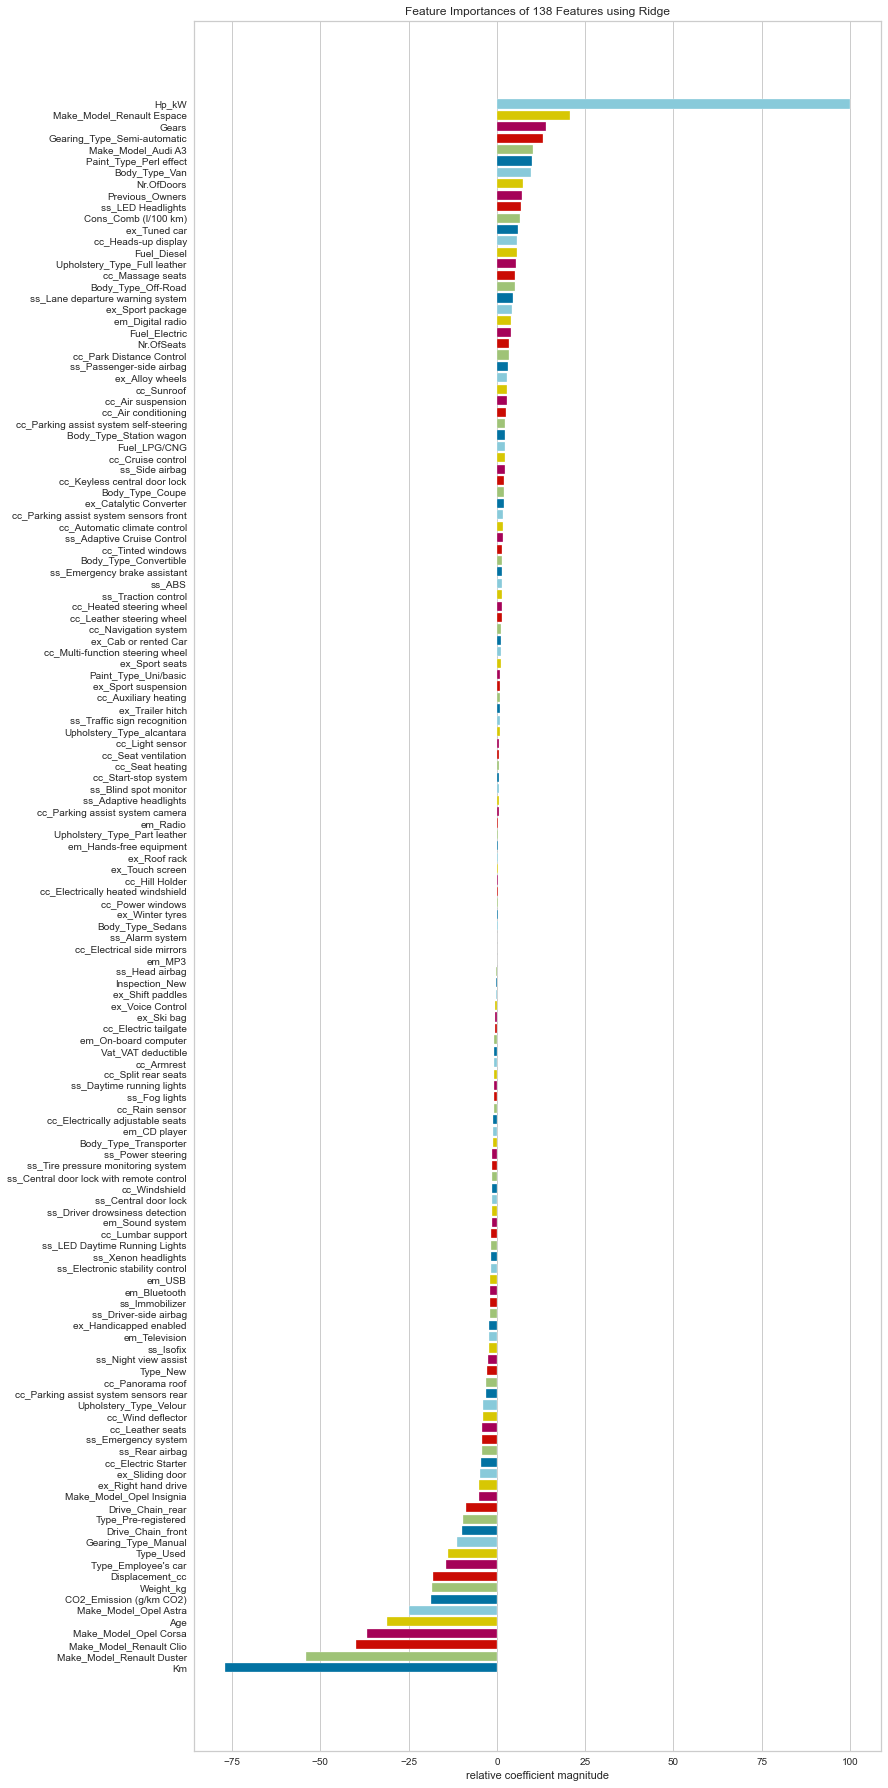

<AxesSubplot:title={'center':'Feature Importances of 138 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [75]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(900, 1800))
viz.fit(X_train_scaled, y_train)
viz.show()

***

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [76]:
from sklearn.linear_model import Lasso, LassoCV

In [77]:
lasso_model = Lasso(random_state=101)
lasso_model.fit(X_train_scaled,y_train)

Lasso(random_state=101)

In [78]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.902,0.902
mae,1401.642,1388.599
mse,3716228.393,3633719.092
rmse,1927.752,1906.232


***grid search (finding best alpha for Lasso)***

In [79]:
# LASSO GRID SEARCH

model = Lasso(random_state=101)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                    cv=10, verbose=1, n_jobs = -1).fit(X_train_scaled, y_train)

print('\n', lasso_grid_model.best_params_)
print('\n', lasso_grid_model.best_estimator_)
print('\n', lasso_grid_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits

 {'alpha': 1.0198989898989899}

 Lasso(alpha=1.0198989898989899, random_state=101)

 -1952.6510705038868


In [80]:
pd.DataFrame(lasso_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.406,0.095,0.004,0.004,0.010,{'alpha': 0.01},-1930.384,-1921.832,-2113.782,-1938.443,-1970.366,-1910.659,-1925.419,-1956.136,-2000.520,-1881.900,-1954.944,61.389,5
1,0.753,0.046,0.003,0.003,0.515,{'alpha': 0.5149494949494949},-1932.488,-1922.074,-2112.570,-1938.809,-1962.014,-1913.165,-1924.502,-1950.990,-1995.932,-1878.849,-1953.139,60.718,2
2,0.750,0.043,0.004,0.006,1.020,{'alpha': 1.0198989898989899},-1935.186,-1920.827,-2111.425,-1939.776,-1958.524,-1914.901,-1924.609,-1949.630,-1995.925,-1875.706,-1952.651,60.614,1
3,0.706,0.051,0.004,0.004,1.525,{'alpha': 1.5248484848484847},-1937.847,-1920.393,-2111.123,-1940.004,-1956.720,-1917.094,-1926.664,-1949.716,-1996.353,-1875.978,-1953.189,60.236,3
4,0.653,0.035,0.002,0.004,2.030,{'alpha': 2.0297979797979795},-1941.152,-1921.425,-2112.209,-1941.302,-1955.987,-1920.149,-1929.872,-1950.684,-1997.482,-1878.929,-1954.919,59.731,4
5,0.622,0.034,0.001,0.002,2.535,{'alpha': 2.5347474747474745},-1946.257,-1923.549,-2115.040,-1943.547,-1956.137,-1924.045,-1933.996,-1952.376,-1999.376,-1882.236,-1957.656,59.507,6
6,0.621,0.036,0.002,0.003,3.040,{'alpha': 3.039696969696969},-1951.892,-1925.906,-2118.668,-1946.332,-1956.643,-1928.629,-1937.973,-1954.555,-2002.007,-1885.898,-1960.850,59.455,7
7,0.545,0.061,0.000,0.000,3.545,{'alpha': 3.544646464646464},-1957.958,-1928.472,-2122.564,-1949.683,-1957.542,-1934.093,-1942.549,-1957.511,-2005.059,-1889.894,-1964.532,59.380,8
8,0.445,0.029,0.002,0.003,4.050,{'alpha': 4.049595959595959},-1964.680,-1931.686,-2126.957,-1953.815,-1958.586,-1939.984,-1947.303,-1960.980,-2008.742,-1894.576,-1968.731,59.325,9
9,0.446,0.029,0.001,0.002,4.555,{'alpha': 4.554545454545454},-1971.520,-1935.056,-2131.324,-1958.190,-1960.167,-1946.182,-1952.450,-1964.262,-2012.860,-1899.637,-1973.165,59.229,10


In [81]:
lasso_grid_model.best_index_

2

In [82]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.902,0.902
mae,1401.669,1388.594
mse,3716574.869,3633689.648
rmse,1927.842,1906.224


In [83]:
# AVERAGE WRONG PREDICTION RATE

-lasso_grid_model.best_score_ / df3.Price.mean()

0.11294316925282934

In [84]:
# scores
y_pred = lasso_grid_model.predict(X_test_scaled)

lasso_grid_model_R2 = r2_score(y_test, y_pred)
lasso_grid_model_mae = mean_absolute_error(y_test, y_pred)
lasso_grid_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_grid_model_cvscore = -(lasso_grid_model.best_score_)

***prediction error and residuals***

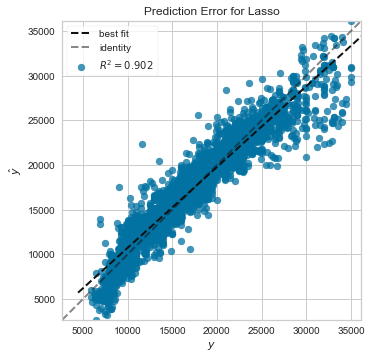

In [85]:
# yellowbrick

model = Lasso(alpha=1.0198989898989899, random_state=101)
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)

visualizer.show(); 

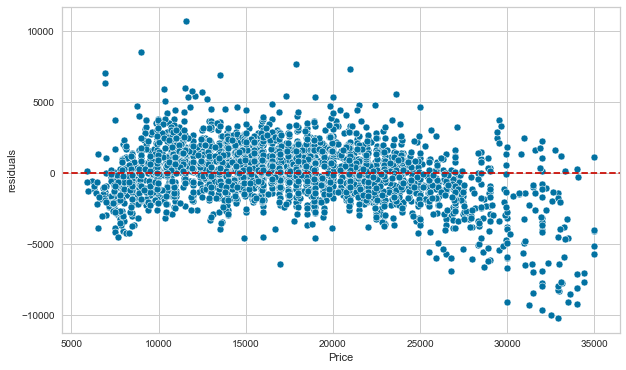

In [86]:
# Residuals Plot (seaborn)
plt.figure(figsize = (10,6))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

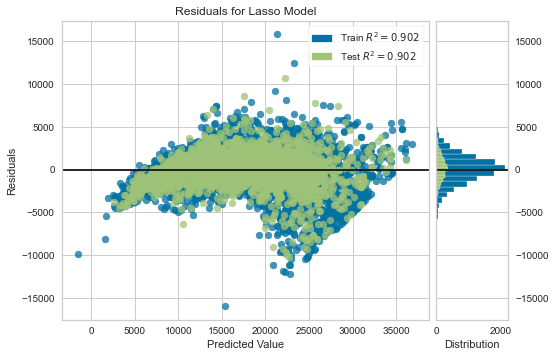

In [87]:
# Residuals Plot (yellowbrick)
model = Lasso(alpha=1.0198989898989899, random_state=101)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test)  
visualizer.show(); 

<IPython.core.display.Javascript object>

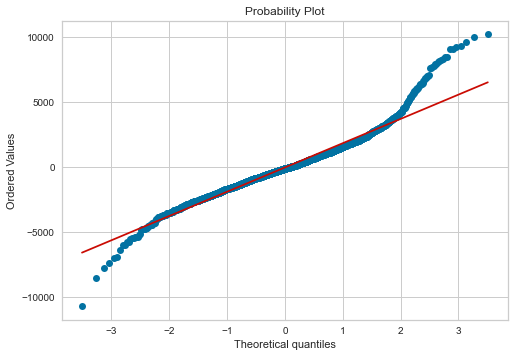

In [88]:
stats.probplot(residuals, dist ="norm", plot=plt);

In [89]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': -(y_test-y_pred) }
compare = pd.DataFrame(my_dict)
comp_sample = compare.sample(15)
comp_sample

,Actual,Pred,Residual
12153,21480,23053.644,1573.644
10967,13980,16320.549,2340.549
13866,18490,21310.662,2820.662
5254,24800,23492.736,-1307.264
13265,12600,13984.549,1384.549
1352,15280,14950.116,-329.884
5474,24688,24853.740,165.740
15452,33285,33426.092,141.092
9017,7800,4298.847,-3501.153
15007,26990,28234.531,1244.531


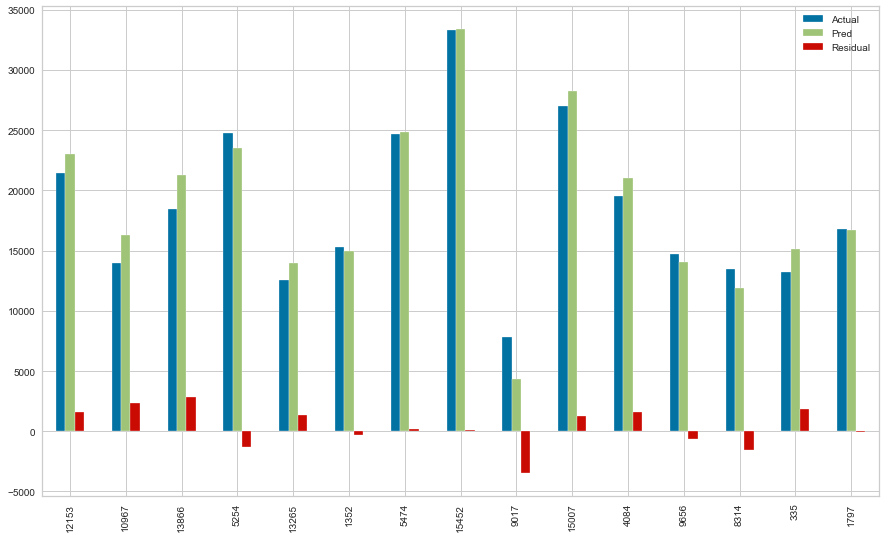

In [90]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

***coefficients of determination (feature importance)***

In [91]:
lasso_model=Lasso(alpha=1.0198989898989899, random_state=101).fit(X_train_scaled, y_train)
pd.DataFrame(lasso_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
Km,-10905.142
Make_Model_Renault Duster,-7011.465
Make_Model_Renault Clio,-5547.598
Make_Model_Opel Corsa,-5209.644
Age,-4402.481
Make_Model_Opel Astra,-3468.701
Weight_kg,-2301.618
Displacement_cc,-2230.921
Type_Employee's car,-1938.486
Type_Used,-1887.401


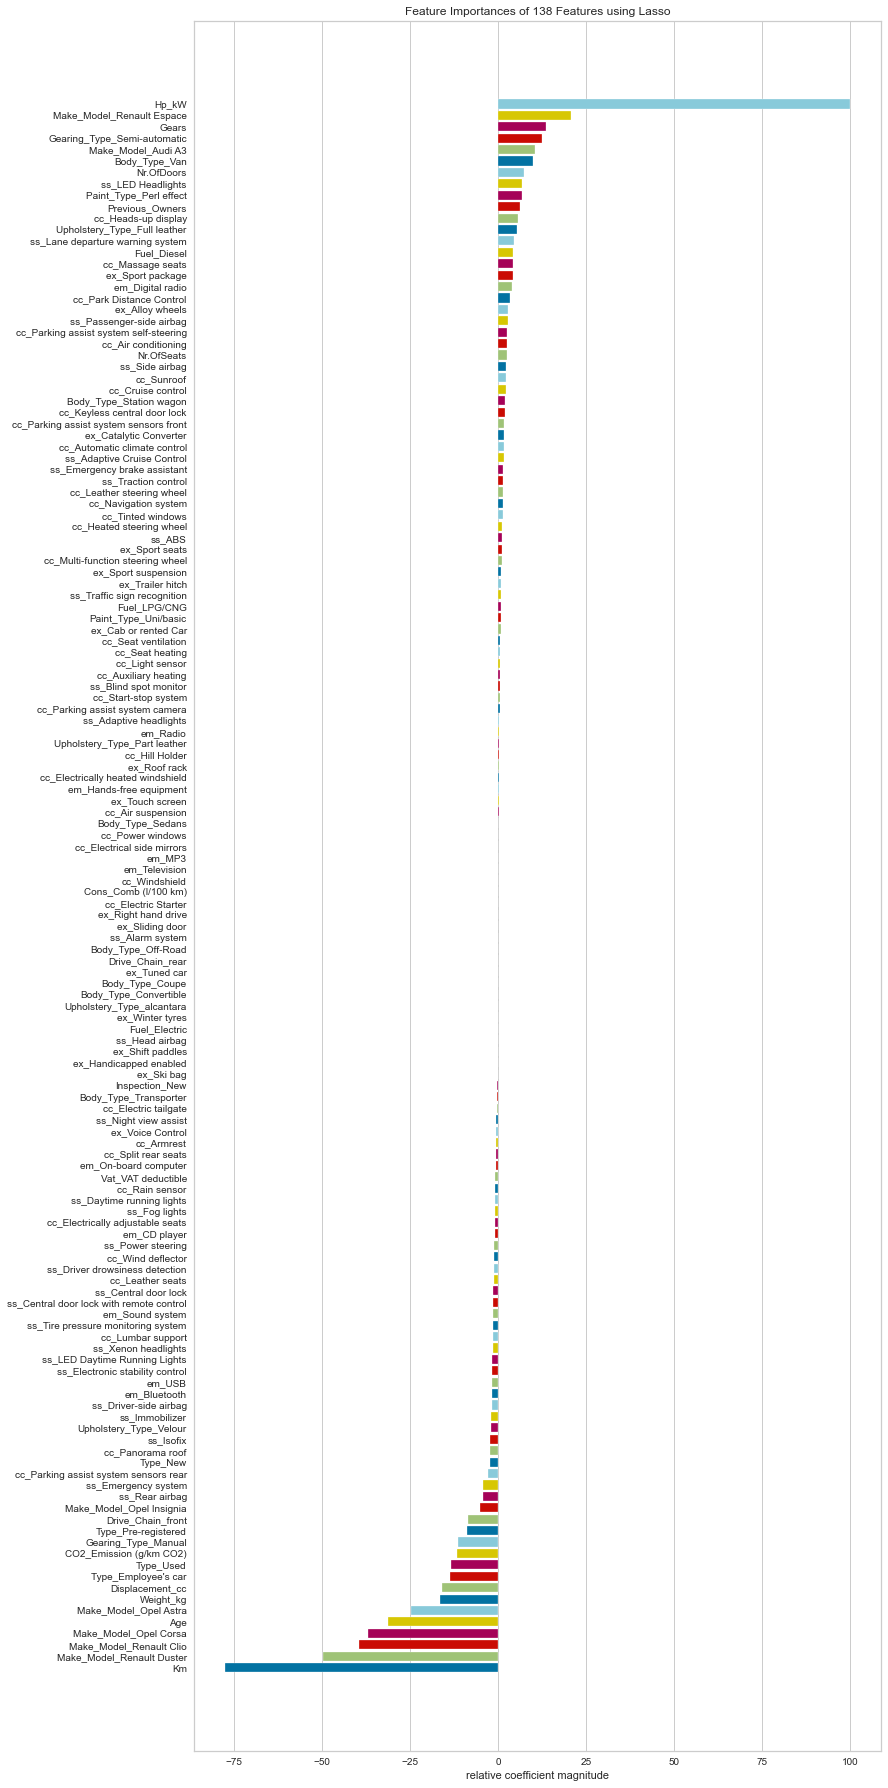

<AxesSubplot:title={'center':'Feature Importances of 138 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [92]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(900, 1800))
viz.fit(X_train_scaled, y_train)
viz.show()

***

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
elastic_model = ElasticNet(random_state=101)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=101)

In [95]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.594,0.600
mae,3087.065,3064.740
mse,15333794.344,14764553.471
rmse,3915.839,3842.467


***grid search (finding best alpha and l1_ratio for ElasticNet)***

In [96]:
# ELASTICNET GRID SEARCH

model = ElasticNet(random_state=101)

param_grid = {'alpha':[0.01, 0.05, 0.1, 0.5, 0.8, 1, 2, 10], 
              'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 0.95]}

elastic_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                                  cv=10, verbose=1, n_jobs = -1).fit(X_train_scaled, y_train)

print('\n', elastic_grid_model.best_params_)
print('\n', elastic_grid_model.best_estimator_)
print('\n', elastic_grid_model.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits

 {'alpha': 0.01, 'l1_ratio': 0.95}

 ElasticNet(alpha=0.01, l1_ratio=0.95, random_state=101)

 -1960.8944964464604


In [97]:
pd.DataFrame(elastic_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.662,0.135,0.002,0.002,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2139.540,-2079.156,-2249.096,-2116.275,-2091.154,-2132.056,-2107.819,-2133.643,-2166.998,-2076.419,-2129.215,48.271,9
1,1.377,0.031,0.002,0.003,0.010,0.300,"{'alpha': 0.01, 'l1_ratio': 0.3}",-2105.437,-2049.157,-2223.512,-2082.983,-2067.146,-2101.570,-2077.447,-2100.725,-2137.394,-2043.849,-2098.922,49.285,8
2,1.359,0.040,0.002,0.003,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2066.120,-2015.692,-2194.869,-2045.483,-2040.274,-2065.710,-2042.889,-2063.642,-2103.859,-2006.552,-2064.509,50.701,5
3,1.360,0.050,0.002,0.004,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2018.806,-1977.109,-2161.454,-2001.964,-2008.971,-2020.250,-2001.738,-2020.281,-2064.287,-1961.573,-2023.643,52.795,4
4,1.253,0.051,0.003,0.004,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1959.587,-1932.765,-2122.242,-1952.232,-1972.802,-1955.104,-1950.350,-1969.518,-2016.502,-1904.061,-1973.516,56.561,2
5,1.266,0.045,0.002,0.004,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1943.501,-1923.108,-2113.748,-1941.493,-1965.731,-1933.501,-1936.317,-1958.252,-2004.670,-1888.624,-1960.894,58.305,1
6,0.996,0.037,0.004,0.004,0.050,0.100,"{'alpha': 0.05, 'l1_ratio': 0.1}",-2508.198,-2436.346,-2567.248,-2496.699,-2393.176,-2472.430,-2459.717,-2521.920,-2515.889,-2444.332,-2481.595,47.845,17
7,0.983,0.031,0.004,0.005,0.050,0.300,"{'alpha': 0.05, 'l1_ratio': 0.3}",-2427.533,-2355.601,-2492.649,-2412.232,-2321.827,-2395.547,-2379.873,-2433.850,-2436.155,-2362.596,-2401.786,46.711,15
8,0.908,0.095,0.000,0.001,0.050,0.500,"{'alpha': 0.05, 'l1_ratio': 0.5}",-2335.204,-2264.146,-2409.973,-2315.835,-2243.032,-2308.940,-2290.056,-2334.435,-2346.694,-2269.327,-2311.764,46.062,12
9,0.977,0.037,0.000,0.001,0.050,0.700,"{'alpha': 0.05, 'l1_ratio': 0.7}",-2224.087,-2156.887,-2315.799,-2201.182,-2153.798,-2207.480,-2184.951,-2218.189,-2242.676,-2158.572,-2206.362,46.616,11


In [98]:
elastic_grid_model.best_index_

5

In [99]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.901,0.901
mae,1403.952,1394.252
mse,3736033.114,3667601.347
rmse,1932.882,1915.098


In [100]:
# AVERAGE WRONG PREDICTION RATE

-elastic_grid_model.best_score_ / df3.Price.mean()

0.11341997674061824

In [101]:
# scores
y_pred = elastic_grid_model.predict(X_test_scaled)

elastic_grid_model_R2 = r2_score(y_test, y_pred)
elastic_grid_model_mae = mean_absolute_error(y_test, y_pred)
elastic_grid_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
elastic_grid_model_cvscore = -(elastic_grid_model.best_score_)

***prediction error and residuals***

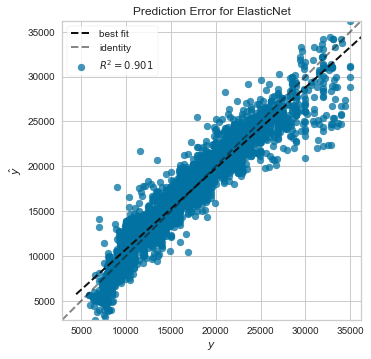

In [102]:
# yellowbrick

model = ElasticNet(alpha=0.01, l1_ratio=0.95, random_state=101)
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)

visualizer.show(); 

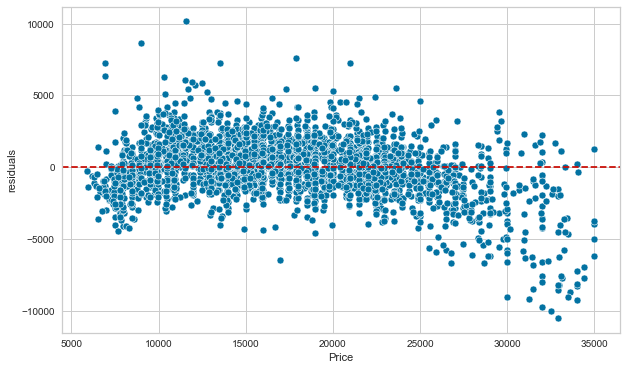

In [103]:
# Residuals Plot (seaborn)
plt.figure(figsize = (10,6))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

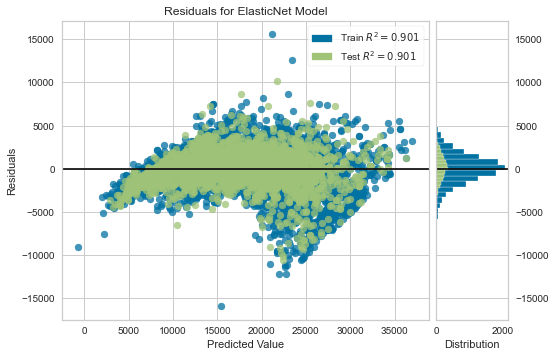

In [104]:
# Residuals Plot (yellowbrick)
model = ElasticNet(alpha=0.01, l1_ratio=0.95, random_state=101)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test)  
visualizer.show(); 

<IPython.core.display.Javascript object>

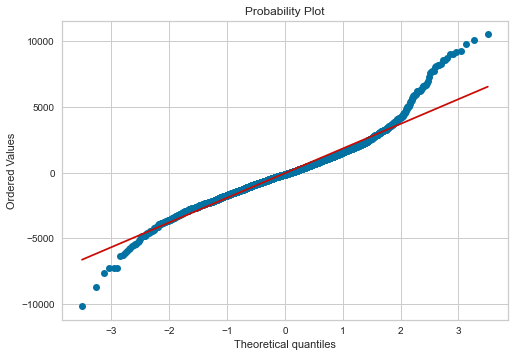

In [105]:
stats.probplot(residuals, dist ="norm", plot=plt);

In [106]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': -(y_test-y_pred) }
compare = pd.DataFrame(my_dict)
comp_sample = compare.sample(15)
comp_sample

,Actual,Pred,Residual
979,21140,20515.482,-624.518
13520,8150,9842.589,1692.589
5201,25950,26652.999,702.999
473,13940,11637.235,-2302.765
9985,16450,16444.463,-5.537
1788,16900,17067.672,167.672
9813,9865,9208.077,-656.923
167,17500,16061.357,-1438.643
4832,21375,21771.764,396.764
7339,15200,15185.191,-14.809


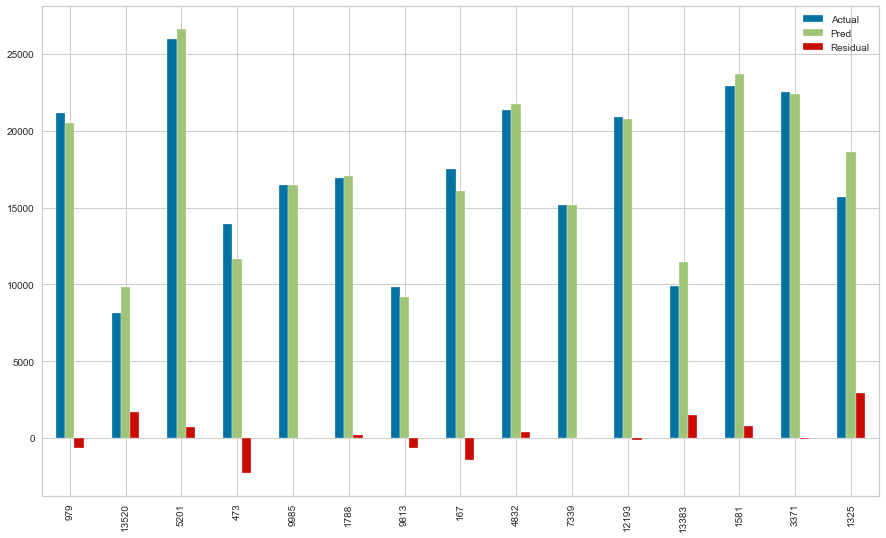

In [107]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

***coefficients of determination (feature importance)***

In [108]:
elastic_model=ElasticNet(alpha=0.01, l1_ratio=0.95, random_state=101).fit(X_train_scaled, y_train)
pd.DataFrame(elastic_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
Km,-10022.700
Make_Model_Renault Clio,-5514.645
Make_Model_Renault Duster,-5399.527
Make_Model_Opel Corsa,-5371.596
Age,-4567.822
Make_Model_Opel Astra,-3343.606
CO2_Emission (g/km CO2),-2167.209
Weight_kg,-2055.211
Type_Employee's car,-1957.000
Type_Used,-1927.288


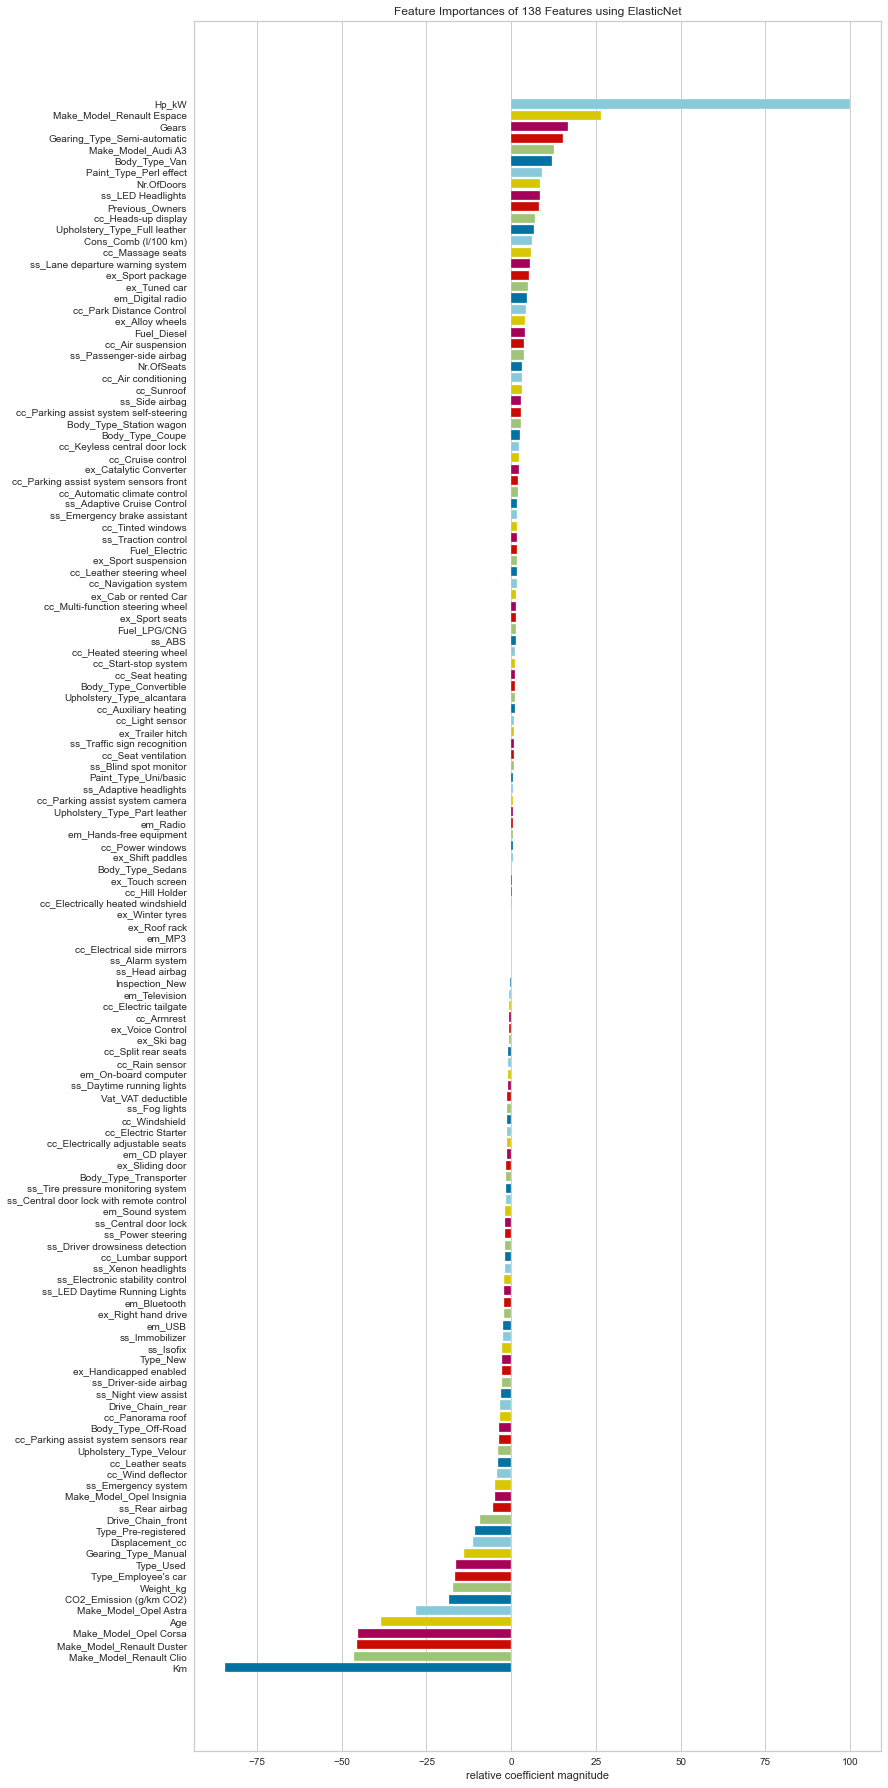

<AxesSubplot:title={'center':'Feature Importances of 138 Features using ElasticNet'}, xlabel='relative coefficient magnitude'>

In [109]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(elastic_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(900, 1800))
viz.fit(X_train_scaled, y_train)
viz.show()

***

## 7. Modeling With a New Dataframe (Specific Columns Based On Feature Importances Results)

In [110]:
df_new = df2[['Make_Model','Hp_kW','Km','Age','Gearing_Type', 'Gears','Price']]
df_new

,Make_Model,Hp_kW,Km,Age,Gearing_Type,Gears,Price
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,16790
...,...,...,...,...,...,...,...
15908,Renault Espace,147.000,16.987,0.000,Automatic,6.000,39950
15909,Renault Espace,165.000,9900.000,0.000,Automatic,7.000,39885
15910,Renault Espace,146.000,15.000,0.000,Automatic,6.000,39875
15911,Renault Espace,147.000,10.000,0.000,Automatic,6.000,39700


In [111]:
df_new = df_new[~(df_new.Price>35000)]

In [112]:
df_new = pd.get_dummies(df_new)
df_new

,Hp_kW,Km,Age,Gears,Price,Make_Model_Audi A1,Make_Model_Audi A3,Make_Model_Opel Astra,Make_Model_Opel Corsa,Make_Model_Opel Insignia,Make_Model_Renault Clio,Make_Model_Renault Duster,Make_Model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,7.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,7.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,7.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,6.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,7.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,118.000,10803.000,1.000,6.000,33990,0,0,0,0,0,0,0,1,1,0,0
15786,165.000,15.000,0.000,7.000,33975,0,0,0,0,0,0,0,1,1,0,0
15787,118.000,1.000,1.000,6.000,33990,0,0,0,0,0,0,0,1,1,0,0
15788,146.000,15.000,0.000,6.000,33975,0,0,0,0,0,0,0,1,1,0,0


In [113]:
len(df3)

15418

In [114]:
X = df_new.drop(columns=['Price'])
y= df_new.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# LASSO GRID SEARCH

model = Lasso(max_iter=10000, random_state=101)

alpha_space = np.linspace(0.01, 20, 50)
param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                                 cv=10, verbose=1, n_jobs = -1).fit(X_train_scaled, y_train)

print('\n', lasso_final_model.best_params_)
print('\n', lasso_final_model.best_estimator_)
print('\n', lasso_final_model.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits

 {'alpha': 0.01}

 Lasso(alpha=0.01, max_iter=10000, random_state=101)

 -2222.6699633431563


In [117]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.869,0.876
mae,1602.164,1551.759
mse,4932428.537,4582018.859
rmse,2220.907,2140.565


In [118]:
# AVERAGE WRONG PREDICTION RATE

-lasso_final_model.best_score_ / df_new.Price.mean()

0.12856131525755174

In [119]:
# scores
y_pred = lasso_final_model.predict(X_test_scaled)

lasso_final_model_R2 = r2_score(y_test, y_pred)
lasso_final_model_mae = mean_absolute_error(y_test, y_pred)
lasso_final_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_final_model_cvscore = -(lasso_final_model.best_score_)

***

## 8. Visually Compare Models Performance In a Graph

In [120]:
compare = pd.DataFrame({'Model': ['Linear','Ridge','Lasso','Elastic_Net','Final_Model'],
    'R2': [lr_model_R2, ridge_grid_model_R2, lasso_grid_model_R2, elastic_grid_model_R2, lasso_final_model_R2],
    'mae': [lr_model_mae, ridge_grid_model_mae, lasso_grid_model_mae, elastic_grid_model_mae, lasso_final_model_mae],  
    'rmse': [lr_model_rmse, ridge_grid_model_rmse, lasso_grid_model_rmse,elastic_grid_model_rmse, lasso_final_model_rmse],
    'cv_score': [lr_model_cvscore, ridge_grid_model_cvscore, lasso_grid_model_cvscore, elastic_grid_model_cvscore, 
                 lasso_final_model_cvscore]})

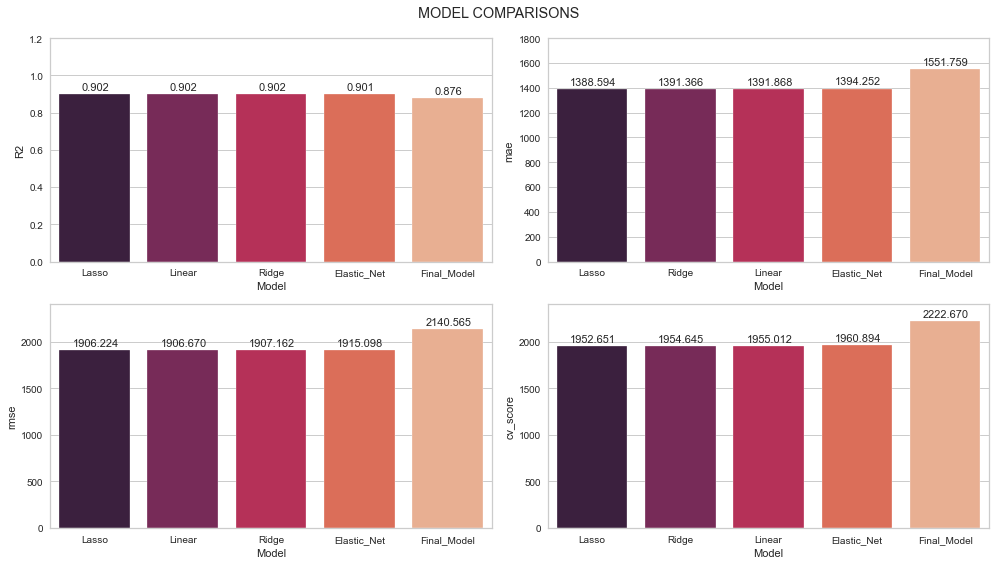

In [121]:
fig, ax = plt.subplots(2,2, figsize=(14,8))

def labels(ax, i, k):
    for p in ax[i][k].patches:
        ax[i][k].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=11)
                
sns.barplot(x='Model', y='R2', data=compare.sort_values('R2', ascending=False), palette='rocket', ax=ax[0][0]), 
labels(ax,0,0), ax[0][0].set_ylim(0, 1.2)
sns.barplot(x='Model', y='mae', data=compare.sort_values('mae', ascending=True), palette='rocket', ax=ax[0][1]), 
labels(ax,0,1), ax[0][1].set_ylim(0, 1800)
sns.barplot(x='Model', y='rmse', data=compare.sort_values('rmse', ascending=True), palette='rocket', ax=ax[1][0]), 
labels(ax,1,0), ax[1][0].set_ylim(0, 2400)
sns.barplot(x='Model', y='cv_score', data=compare.sort_values('cv_score', ascending=True), palette='rocket', ax=ax[1][1]), 
labels(ax,1,1), ax[1][1].set_ylim(0, 2400)

fig.suptitle('MODEL COMPARISONS')
fig.tight_layout(); 

In [ ]:
# we have only 16 columns in the final model

***

## 9. Prediction Errors by Models and Prediction of New Observations

In [122]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(X)

In [123]:
final_model = Lasso(alpha=0.01, max_iter=10000, random_state=101)
final_model.fit(X_scaled,y)

Lasso(alpha=0.01, max_iter=10000, random_state=101)

In [124]:
y_pred = final_model.predict(X_scaled)

In [125]:
df_new['Errors'] = abs(y - y_pred)

In [126]:
print('AVERAGE PREDICTION ERRORS BY MODEL')
print('-----------------------------------')
for col in df_new.iloc[:, 5:13].columns:
    cond = df_new[df_new[col] == 1].Errors.mean()
    print(f'{col:<27}:', cond)

AVERAGE PREDICTION ERRORS BY MODEL
-----------------------------------
Make_Model_Audi A1         : 1463.3884338666671
Make_Model_Audi A3         : 1169.230292687401
Make_Model_Opel Astra      : 1516.8561836151155
Make_Model_Opel Corsa      : 1381.2590734712558
Make_Model_Opel Insignia   : 2134.235378785573
Make_Model_Renault Clio    : 1788.1941390940733
Make_Model_Renault Duster  : 1282.0742104328629
Make_Model_Renault Espace  : 2411.4245063670296


***

In [127]:
my_dict = {
    "Hp_kW": 66,
    "Km": 17000,
    "Age": 2,
    "Gears": 6,
    "Make_Model": 'Audi A3',
    "Gearing_Type": 'Automatic',
}

my_dict = pd.DataFrame([my_dict])
my_dict

,Hp_kW,Km,Age,Gears,Make_Model,Gearing_Type
0,66,17000,2,6,Audi A3,Automatic


In [128]:
X.head(1)

,Hp_kW,Km,Age,Gears,Make_Model_Audi A1,Make_Model_Audi A3,Make_Model_Opel Astra,Make_Model_Opel Corsa,Make_Model_Opel Insignia,Make_Model_Renault Clio,Make_Model_Renault Duster,Make_Model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,7.000,1,0,0,0,0,0,0,0,1,0,0


In [129]:
my_dict = pd.get_dummies(my_dict)
my_dict

,Hp_kW,Km,Age,Gears,Make_Model_Audi A3,Gearing_Type_Automatic
0,66,17000,2,6,1,1


In [130]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,Hp_kW,Km,Age,Gears,Make_Model_Audi A1,Make_Model_Audi A3,Make_Model_Opel Astra,Make_Model_Opel Corsa,Make_Model_Opel Insignia,Make_Model_Renault Clio,Make_Model_Renault Duster,Make_Model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,6,0,1,0,0,0,0,0,0,1,0,0


In [131]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.33333333, 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [132]:
final_model.predict(my_dict)

array([19082.18234581])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___